# **5. Frequency Domain Processing**


Images can be represented in two main ways:

* Spatial domain – Each pixel stores intensity or color values.
* Frequency domain – Represents how rapidly image intensity changes; i.e., the image is decomposed into sine/cosine waves of different frequencies.

Why use the frequency domain?

* Filtering: Remove noise, blur, or sharpen an image more efficiently.
* Compression: JPEG uses frequency domain (DCT).
* Feature analysis: Identify periodic patterns


| Frequency | Content                 | Example                    |
| --------- | ----------------------- | -------------------------- |
| Low       | Smooth, gradual changes | Background, large objects  |
| High      | Sharp edges, details    | Text, fine textures, noise |


## **5.1. Fourier Transform**

The Fourier Transform converts a spatial image f(x,y) into its frequency components F(u,v):

$$
F(u,v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x,y) \, e^{-j 2 \pi \left(\frac{u x}{M} + \frac{v y}{N}\right)}
$$

* 2D DFT: Discrete version for digital images.
* FFT: Fast algorithm to compute DFT efficiently.
* Inverse FFT (IFFT): Converts frequency domain back to the spatial image.

Magnitude spectrum helps visualize frequency content. High values often correspond to edges or repeating patterns.

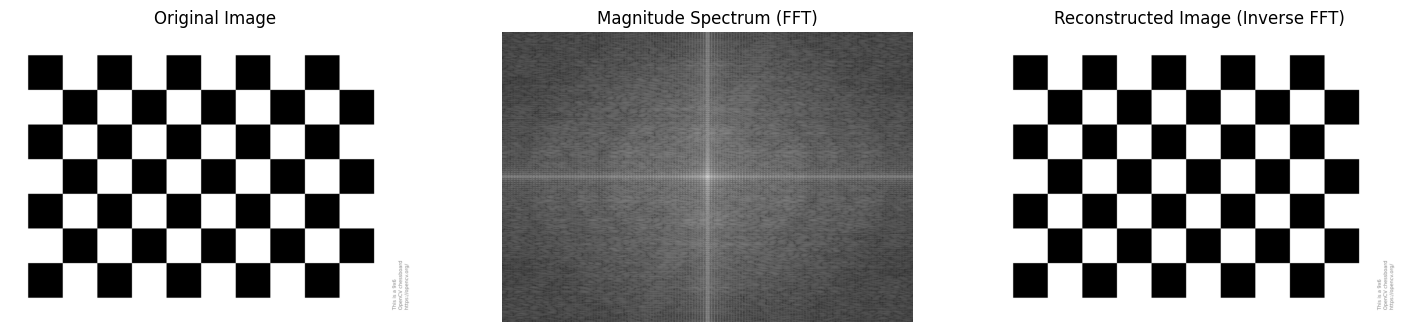

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (grayscale)
img = cv2.imread('chessboard.png', 0)  # can replace with 'lana.jpg', 'tiger.jpg', etc.

# -----------------------------
# 1. 2D Discrete Fourier Transform (DFT)
# -----------------------------
def dft2_manual(image):
    """Compute 2D DFT manually (slower, for demonstration)."""
    M, N = image.shape
    F = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    angle = -2j * np.pi * ((u*x)/M + (v*y)/N)
                    sum_val += image[x, y] * np.exp(angle)
            F[u, v] = sum_val
    return F

# Uncomment below line if you want to run a slow manual DFT
# f_dft_manual = dft2_manual(img)

# -----------------------------
# 2. Fast Fourier Transform (FFT)
# -----------------------------
f_fft = np.fft.fft2(img)               # 2D FFT
fshift = np.fft.fftshift(f_fft)        # Shift zero frequency to center
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Log scale for visualization

# -----------------------------
# 3. Inverse FFT
# -----------------------------
img_reconstructed = np.fft.ifft2(np.fft.ifftshift(fshift)).real  # Back to spatial domain

# -----------------------------
# 4. Display results
# -----------------------------
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (FFT)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image (Inverse FFT)')
plt.axis('off')

plt.show()

## **5.2 Frequency Filtering**

Frequency domain makes filtering straightforward.
* Low-pass filter (smoothing / blur): Removes high frequencies → blurs edges, reduces noise.
* High-pass filter (edge sharpening): Removes low frequencies → enhances edges and fine details.
* Simple Band-stop filter (periodic noise removal): Useful for removing repetitive patterns (like moiré in fruits or tiger images).

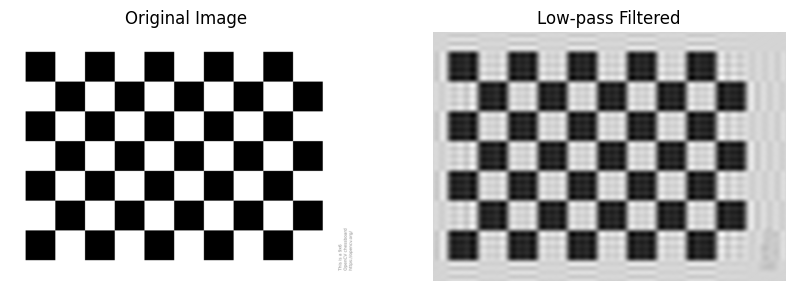

In [ ]:
# Low-pass filter
rows, cols = img.shape
crow, ccol = rows//2 , cols//2

# Create a mask with low-pass filter (square mask)
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Apply mask and inverse FFT
fshift_masked = fshift * mask
img_lowpass = np.fft.ifft2(np.fft.ifftshift(fshift_masked)).real

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_lowpass, cmap='gray')
plt.title('Low-pass Filtered')
plt.axis('off')
plt.show()

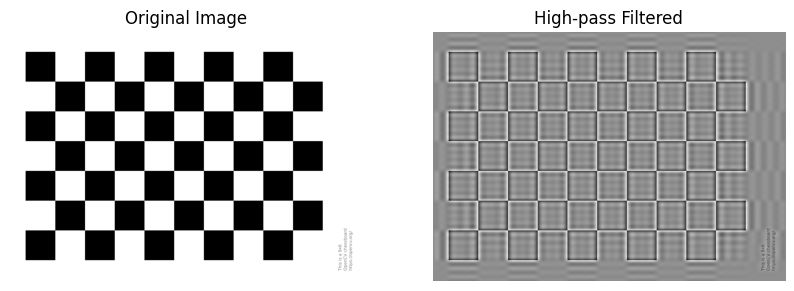

In [ ]:
# High-pass filter
# High-pass mask = 1 - low-pass
mask_hp = 1 - mask
fshift_hp = fshift * mask_hp
img_highpass = np.fft.ifft2(np.fft.ifftshift(fshift_hp)).real

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_highpass, cmap='gray')
plt.title('High-pass Filtered')
plt.axis('off')
plt.show()

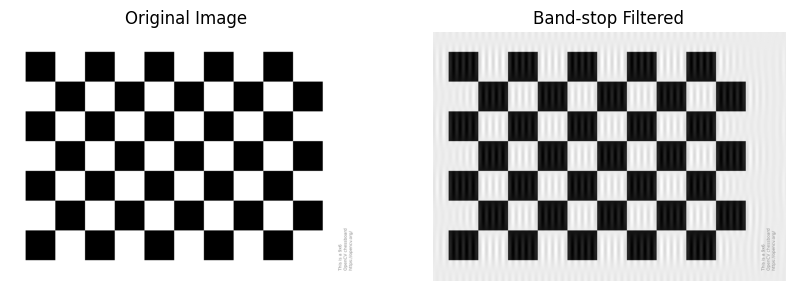

In [ ]:
# Simple Band-stop filter
# Band-stop mask: block a small region of high frequency
mask_bs = np.ones((rows, cols), np.uint8)
mask_bs[crow-5:crow+5, ccol-60:ccol-50] = 0  # block specific frequency
mask_bs[crow-5:crow+5, ccol+50:ccol+60] = 0

fshift_bs = fshift * mask_bs
img_bandstop = np.fft.ifft2(np.fft.ifftshift(fshift_bs)).real

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_bandstop, cmap='gray')
plt.title('Band-stop Filtered')
plt.axis('off')
plt.show()